<a href="https://colab.research.google.com/github/sachinsutar2151/Sales-analysis/blob/main/Daily_Pending_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [ ]:
df=pd.read_excel("/content/EIPL/DAILY_PENDING.xlsx")
df

,CDPHId,Customer Name,Item Name,InitialDateReported,MostRecentDateReported,Quantity,Rate,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741
...,...,...,...,...,...,...,...,...
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114638 entries, 0 to 114637
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CDPHId                  114638 non-null  int64 
 1   Customer Name           114634 non-null  object
 2   Item Name               114620 non-null  object
 3   InitialDateReported     114638 non-null  object
 4   MostRecentDateReported  114638 non-null  object
 5   Quantity                114638 non-null  int64 
 6   Rate                    114638 non-null  int64 
 7   Amount                  114638 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.0+ MB


In [ ]:
column={"CDPHId":"Product_ID","Customer Name":"Customer_Name","Item Name":"Product_Name","InitialDateReported":"Order_Date","MostRecentDateReported":"Dispatch_date","Quantity":"Quantity_in_Kgs","Rate":"Rate_in_INR","Amount":"Amount"}
df.rename(columns=column,inplace=True)
df

,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741
...,...,...,...,...,...,...,...,...
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114638 entries, 0 to 114637
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Product_ID       114638 non-null  int64 
 1   Customer_Name    114634 non-null  object
 2   Product_Name     114620 non-null  object
 3   Order_Date       114638 non-null  object
 4   Dispatch_date    114638 non-null  object
 5   Quantity_in_Kgs  114638 non-null  int64 
 6   Rate_in_INR      114638 non-null  int64 
 7   Amount           114638 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.0+ MB


In [ ]:
df.head()

,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741


In [ ]:
df.tail()

,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870
114637,2,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,EP-4-DOT,31/12/2024,06/24/2025,14428,285,4111980


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114635 entries, 0 to 114637
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Product_ID       114635 non-null  int64 
 1   Customer_Name    114631 non-null  object
 2   Product_Name     114617 non-null  object
 3   Order_Date       114635 non-null  object
 4   Dispatch_date    114635 non-null  object
 5   Quantity_in_Kgs  114635 non-null  int64 
 6   Rate_in_INR      114635 non-null  int64 
 7   Amount           114635 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
df['Customer_Name'].fillna("Unknown",inplace=True)
df

/tmp/ipython-input-4247851022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Name'].fillna("Unknown",inplace=True)


,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741
...,...,...,...,...,...,...,...,...
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114635 entries, 0 to 114637
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Product_ID       114635 non-null  int64 
 1   Customer_Name    114635 non-null  object
 2   Product_Name     114617 non-null  object
 3   Order_Date       114635 non-null  object
 4   Dispatch_date    114635 non-null  object
 5   Quantity_in_Kgs  114635 non-null  int64 
 6   Rate_in_INR      114635 non-null  int64 
 7   Amount           114635 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
df['Product_Name'].fillna("Unknown",inplace=True)
df

/tmp/ipython-input-3351364541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Name'].fillna("Unknown",inplace=True)


,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741
...,...,...,...,...,...,...,...,...
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114635 entries, 0 to 114637
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Product_ID       114635 non-null  int64 
 1   Customer_Name    114635 non-null  object
 2   Product_Name     114635 non-null  object
 3   Order_Date       114635 non-null  object
 4   Dispatch_date    114635 non-null  object
 5   Quantity_in_Kgs  114635 non-null  int64 
 6   Rate_in_INR      114635 non-null  int64 
 7   Amount           114635 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
df.head()

,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,41524,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,41523,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,41523,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,41523,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,41523,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741


In [ ]:
df.tail()

,Product_ID,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
114633,5,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,4,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,3,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,3,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870
114637,2,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,EP-4-DOT,31/12/2024,06/24/2025,14428,285,4111980


In [ ]:
df.drop(['Product_ID'],axis=1,inplace=True)
df

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01 00:00:00,2022-01-01 00:00:00,4567,290,1324430
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01 00:00:00,2022-01-01 00:00:00,9893,301,2977793
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01 00:00:00,2022-01-01 00:00:00,3781,311,1175891
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01 00:00:00,2022-01-02 00:00:00,6053,293,1773529
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02 00:00:00,2022-01-02 00:00:00,8661,281,2433741
...,...,...,...,...,...,...,...
114633,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,31/12/2024,06/24/2025,19298,284,5480632
114634,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,1677,283,474591
114635,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,31/12/2024,06/24/2025,10689,293,3131877
114636,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,31/12/2024,06/24/2025,15703,290,4553870


In [ ]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], errors='coerce')
df['Dispatch_date']=pd.to_datetime(df['Dispatch_date'], errors='coerce')
display(df)

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741
...,...,...,...,...,...,...,...
114633,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,2024-12-31,2025-06-24,19298,284,5480632
114634,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,1677,283,474591
114635,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,10689,293,3131877
114636,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,2024-12-31,2025-06-24,15703,290,4553870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114635 entries, 0 to 114637
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Customer_Name    114635 non-null  object        
 1   Product_Name     114635 non-null  object        
 2   Order_Date       114624 non-null  datetime64[ns]
 3   Dispatch_date    114635 non-null  datetime64[ns]
 4   Quantity_in_Kgs  114635 non-null  int64         
 5   Rate_in_INR      114635 non-null  int64         
 6   Amount           114635 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 7.0+ MB


In [ ]:
df[df['Order_Date'].isnull()].index

Index([55075, 55076, 55077, 55078, 55079, 55080, 55081, 55082, 55083, 55084,
       80973],
      dtype='int64')

In [ ]:
df['Order_Date'][55070:55085]

,Order_Date
55073,2025-02-28
55074,2025-02-28
55075,NaT
55076,NaT
55077,NaT
55078,NaT
55079,NaT
55080,NaT
55081,NaT
55082,NaT


In [ ]:
df['Order_Date']=df['Order_Date'].fillna(method='ffill')
df

/tmp/ipython-input-3921637952.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_Date']=df['Order_Date'].fillna(method='ffill')


,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741
...,...,...,...,...,...,...,...
114633,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,2024-12-31,2025-06-24,19298,284,5480632
114634,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,1677,283,474591
114635,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,10689,293,3131877
114636,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,2024-12-31,2025-06-24,15703,290,4553870


In [ ]:
df['Order_Date'][55070:55085]

,Order_Date
55073,2025-02-28
55074,2025-02-28
55075,2025-02-28
55076,2025-02-28
55077,2025-02-28
55078,2025-02-28
55079,2025-02-28
55080,2025-02-28
55081,2025-02-28
55082,2025-02-28


In [ ]:
df[55070:55085]

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount
55073,DKSR Specialty Chemicals (Odisha 1/153),PRODUCT-PFL-304,2025-02-28,2023-10-16,5230,290,1516700
55074,DR EBERLE CLEVER CHEMISTRY PVT. LTD. (CHENNAI F3),PRODUCT-86-AB,2025-02-28,2023-10-16,6218,308,1915144
55075,Esteem INDUSTRIES Pvt.Ltd. (Pissurlem),PRODUCT-323,2025-02-28,2023-10-16,11289,301,3397989
55076,Esteem INDUSTRIES Pvt.Ltd. (Pissurlem),PRODUCT-323,2025-02-28,2023-10-16,1006,304,305824
55077,Fabicon Technologies (parganas),PRODUCT-323,2025-02-28,2023-10-16,1359,284,385956
55078,Fabicon Technologies (parganas),ESTEEM-30-AI,2025-02-28,2023-10-16,503,286,143858
55079,JAYWANTI OILS & CHEMICALS (H No 260/1),ESTEEM-30-ADE,2025-02-28,2023-10-16,12680,308,3905440
55080,KELVIN BIO ORGANICS PVT. LTD.,ESTEEM-30-ADE,2025-02-28,2023-10-16,11002,306,3366612
55081,MOHINI AUXI CHEM PVT. LTD.,ESTEEM-30-ADE,2025-02-28,2023-10-16,4489,297,1333233
55082,SANGAM (INDIA) LTD. (Denim Unit),ESTEEM-30-ADE,2025-02-28,2023-10-16,19791,292,5778972


In [ ]:
df['Month_Year']=df['Order_Date'].dt.strftime("%b %Y")
df

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount,Month_Year
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430,Jan 2022
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793,Jan 2022
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891,Jan 2022
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529,Jan 2022
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741,Jan 2022
...,...,...,...,...,...,...,...,...
114633,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,2024-12-31,2025-06-24,19298,284,5480632,Dec 2024
114634,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,1677,283,474591,Dec 2024
114635,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,10689,293,3131877,Dec 2024
114636,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,2024-12-31,2025-06-24,15703,290,4553870,Dec 2024


In [ ]:
df['Year']=df['Order_Date'].dt.strftime("%Y")
df

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount,Month_Year,Year
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430,Jan 2022,2022
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793,Jan 2022,2022
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891,Jan 2022,2022
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529,Jan 2022,2022
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741,Jan 2022,2022
...,...,...,...,...,...,...,...,...,...
114633,Grauer & Weil (India) Ltd. (Dadra),ESTEEM-16-AJ,2024-12-31,2025-06-24,19298,284,5480632,Dec 2024,2024
114634,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,1677,283,474591,Dec 2024,2024
114635,Hardcastle Petrofer Pvt. Ltd.,PRODUCT-STA,2024-12-31,2025-06-24,10689,293,3131877,Dec 2024,2024
114636,HUMMERS LUBES & CHEMICALS (INDIA) PVT. LTD. (C...,ESTEEM-12-AT,2024-12-31,2025-06-24,15703,290,4553870,Dec 2024,2024


In [ ]:
df.sort_values(by=["Order_Date","Dispatch_date","Month_Year"],ascending=[True,True,True],inplace=True)
df

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount,Month_Year,Year
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430,Jan 2022,2022
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793,Jan 2022,2022
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891,Jan 2022,2022
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529,Jan 2022,2022
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741,Jan 2022,2022
...,...,...,...,...,...,...,...,...,...
74974,DEVU CHEM LLP (Khambha Plot no 133),ESTEEM-12-AT,2025-07-13,2024-09-08,11843,284,3363412,Jul 2025,2025
78482,YORK CHEMICALS,PRODUCT-27-AC,2025-07-26,2024-11-10,1264,311,393104,Jul 2025,2025
77675,SHREEJI ENTERPRISE (SURAT 404),PRODUCT-VPET,2025-08-03,2024-11-04,12945,293,3792885,Aug 2025,2025
77676,SI GROUP INDIA PVT. LTD.,ESTEEM-48-AEE,2025-08-03,2024-11-04,10504,301,3161704,Aug 2025,2025


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Customer_Name,Product_Name,Order_Date,Dispatch_date,Quantity_in_Kgs,Rate_in_INR,Amount,Month_Year,Year
0,V-CHEM (MUMBAI E 59),Ethylene Oxide,2022-01-01,2022-01-01,4567,290,1324430,Jan 2022,2022
1,V-CHEM (MUMBAI E 59),VC-18,2022-01-01,2022-01-01,9893,301,2977793,Jan 2022,2022
2,V-CHEM (MUMBAI E 59),VC-20,2022-01-01,2022-01-01,3781,311,1175891,Jan 2022,2022
3,SI GROUP INDIA PVT. LTD.,ETHOXYLATED ALCOHOL 2,2022-01-01,2022-01-02,6053,293,1773529,Jan 2022,2022
4,Godrej Industries Ltd. (BHARUCH),PRODUCT-35-AJ,2022-01-02,2022-01-02,8661,281,2433741,Jan 2022,2022
...,...,...,...,...,...,...,...,...,...
114630,DEVU CHEM LLP (Khambha Plot no 133),ESTEEM-12-AT,2025-07-13,2024-09-08,11843,284,3363412,Jul 2025,2025
114631,YORK CHEMICALS,PRODUCT-27-AC,2025-07-26,2024-11-10,1264,311,393104,Jul 2025,2025
114632,SHREEJI ENTERPRISE (SURAT 404),PRODUCT-VPET,2025-08-03,2024-11-04,12945,293,3792885,Aug 2025,2025
114633,SI GROUP INDIA PVT. LTD.,ESTEEM-48-AEE,2025-08-03,2024-11-04,10504,301,3161704,Aug 2025,2025


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Customer_Name    114635 non-null  object        
 1   Product_Name     114635 non-null  object        
 2   Order_Date       114635 non-null  datetime64[ns]
 3   Dispatch_date    114635 non-null  datetime64[ns]
 4   Quantity_in_Kgs  114635 non-null  int64         
 5   Rate_in_INR      114635 non-null  int64         
 6   Amount           114635 non-null  int64         
 7   Month_Year       114635 non-null  object        
 8   Year             114635 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 7.9+ MB


EDA

In [ ]:
df.columns

Index(['Customer_Name', 'Product_Name', 'Order_Date', 'Dispatch_date',
       'Quantity_in_Kgs', 'Rate_in_INR', 'Amount', 'Month_Year', 'Year'],
      dtype='object')

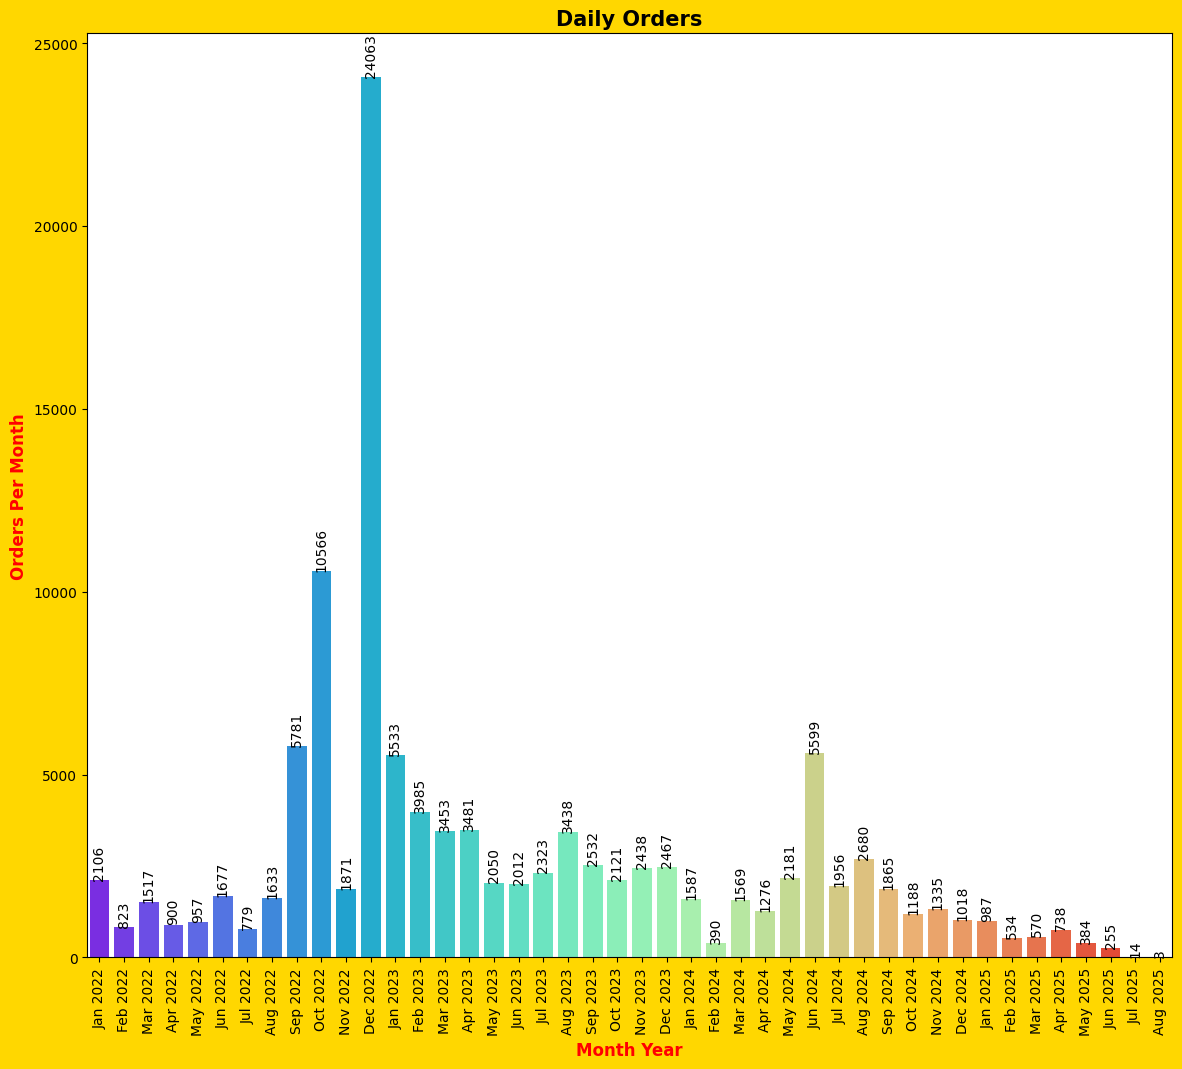

In [ ]:
plt.figure(figsize=(14,12),facecolor='gold')
DP=sns.countplot(x='Month_Year',data=df,hue='Month_Year',palette='rainbow')
def data_label(arg):
  for i in arg.containers:
    arg.bar_label(i,fontsize=10,label_type="edge",color="black",rotation=90)
data_label(DP)
plt.xticks(rotation=90)
plt.xlabel('Month Year',fontsize=12,color='red',fontweight='bold')
plt.ylabel('Orders Per Month',fontsize=12,color='red',fontweight='bold')
plt.title('Daily Orders',fontsize=15,fontweight='bold')
plt.show()

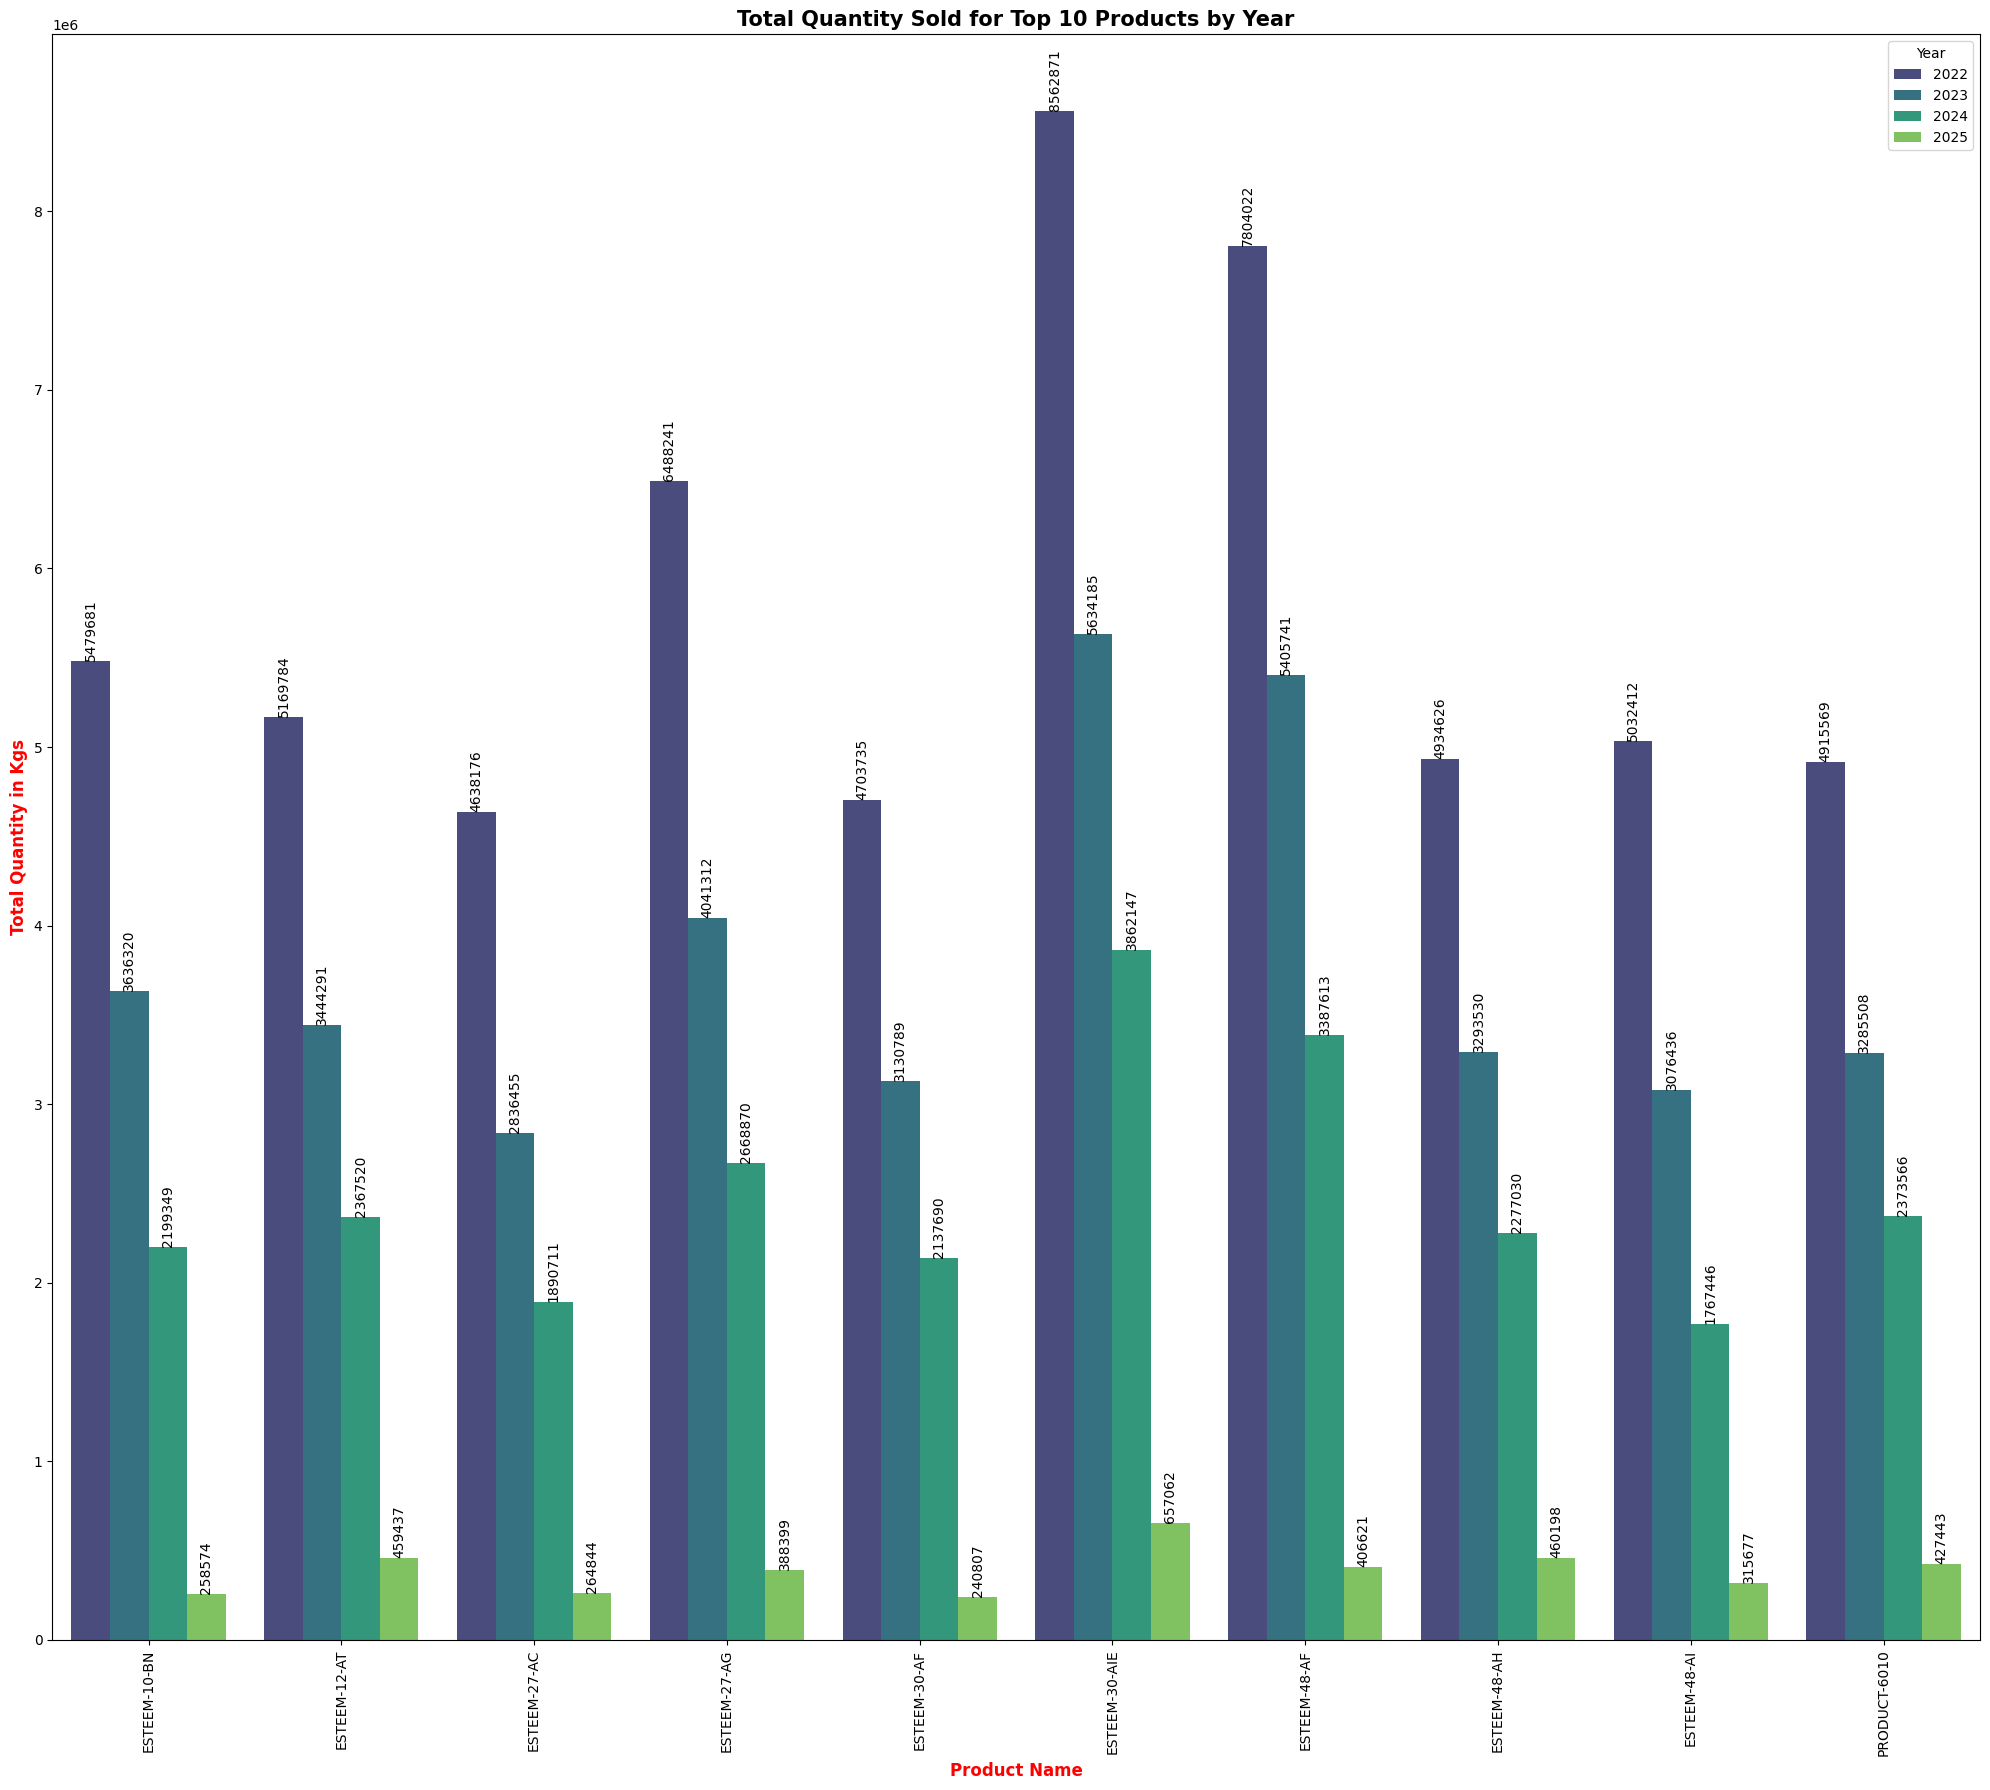

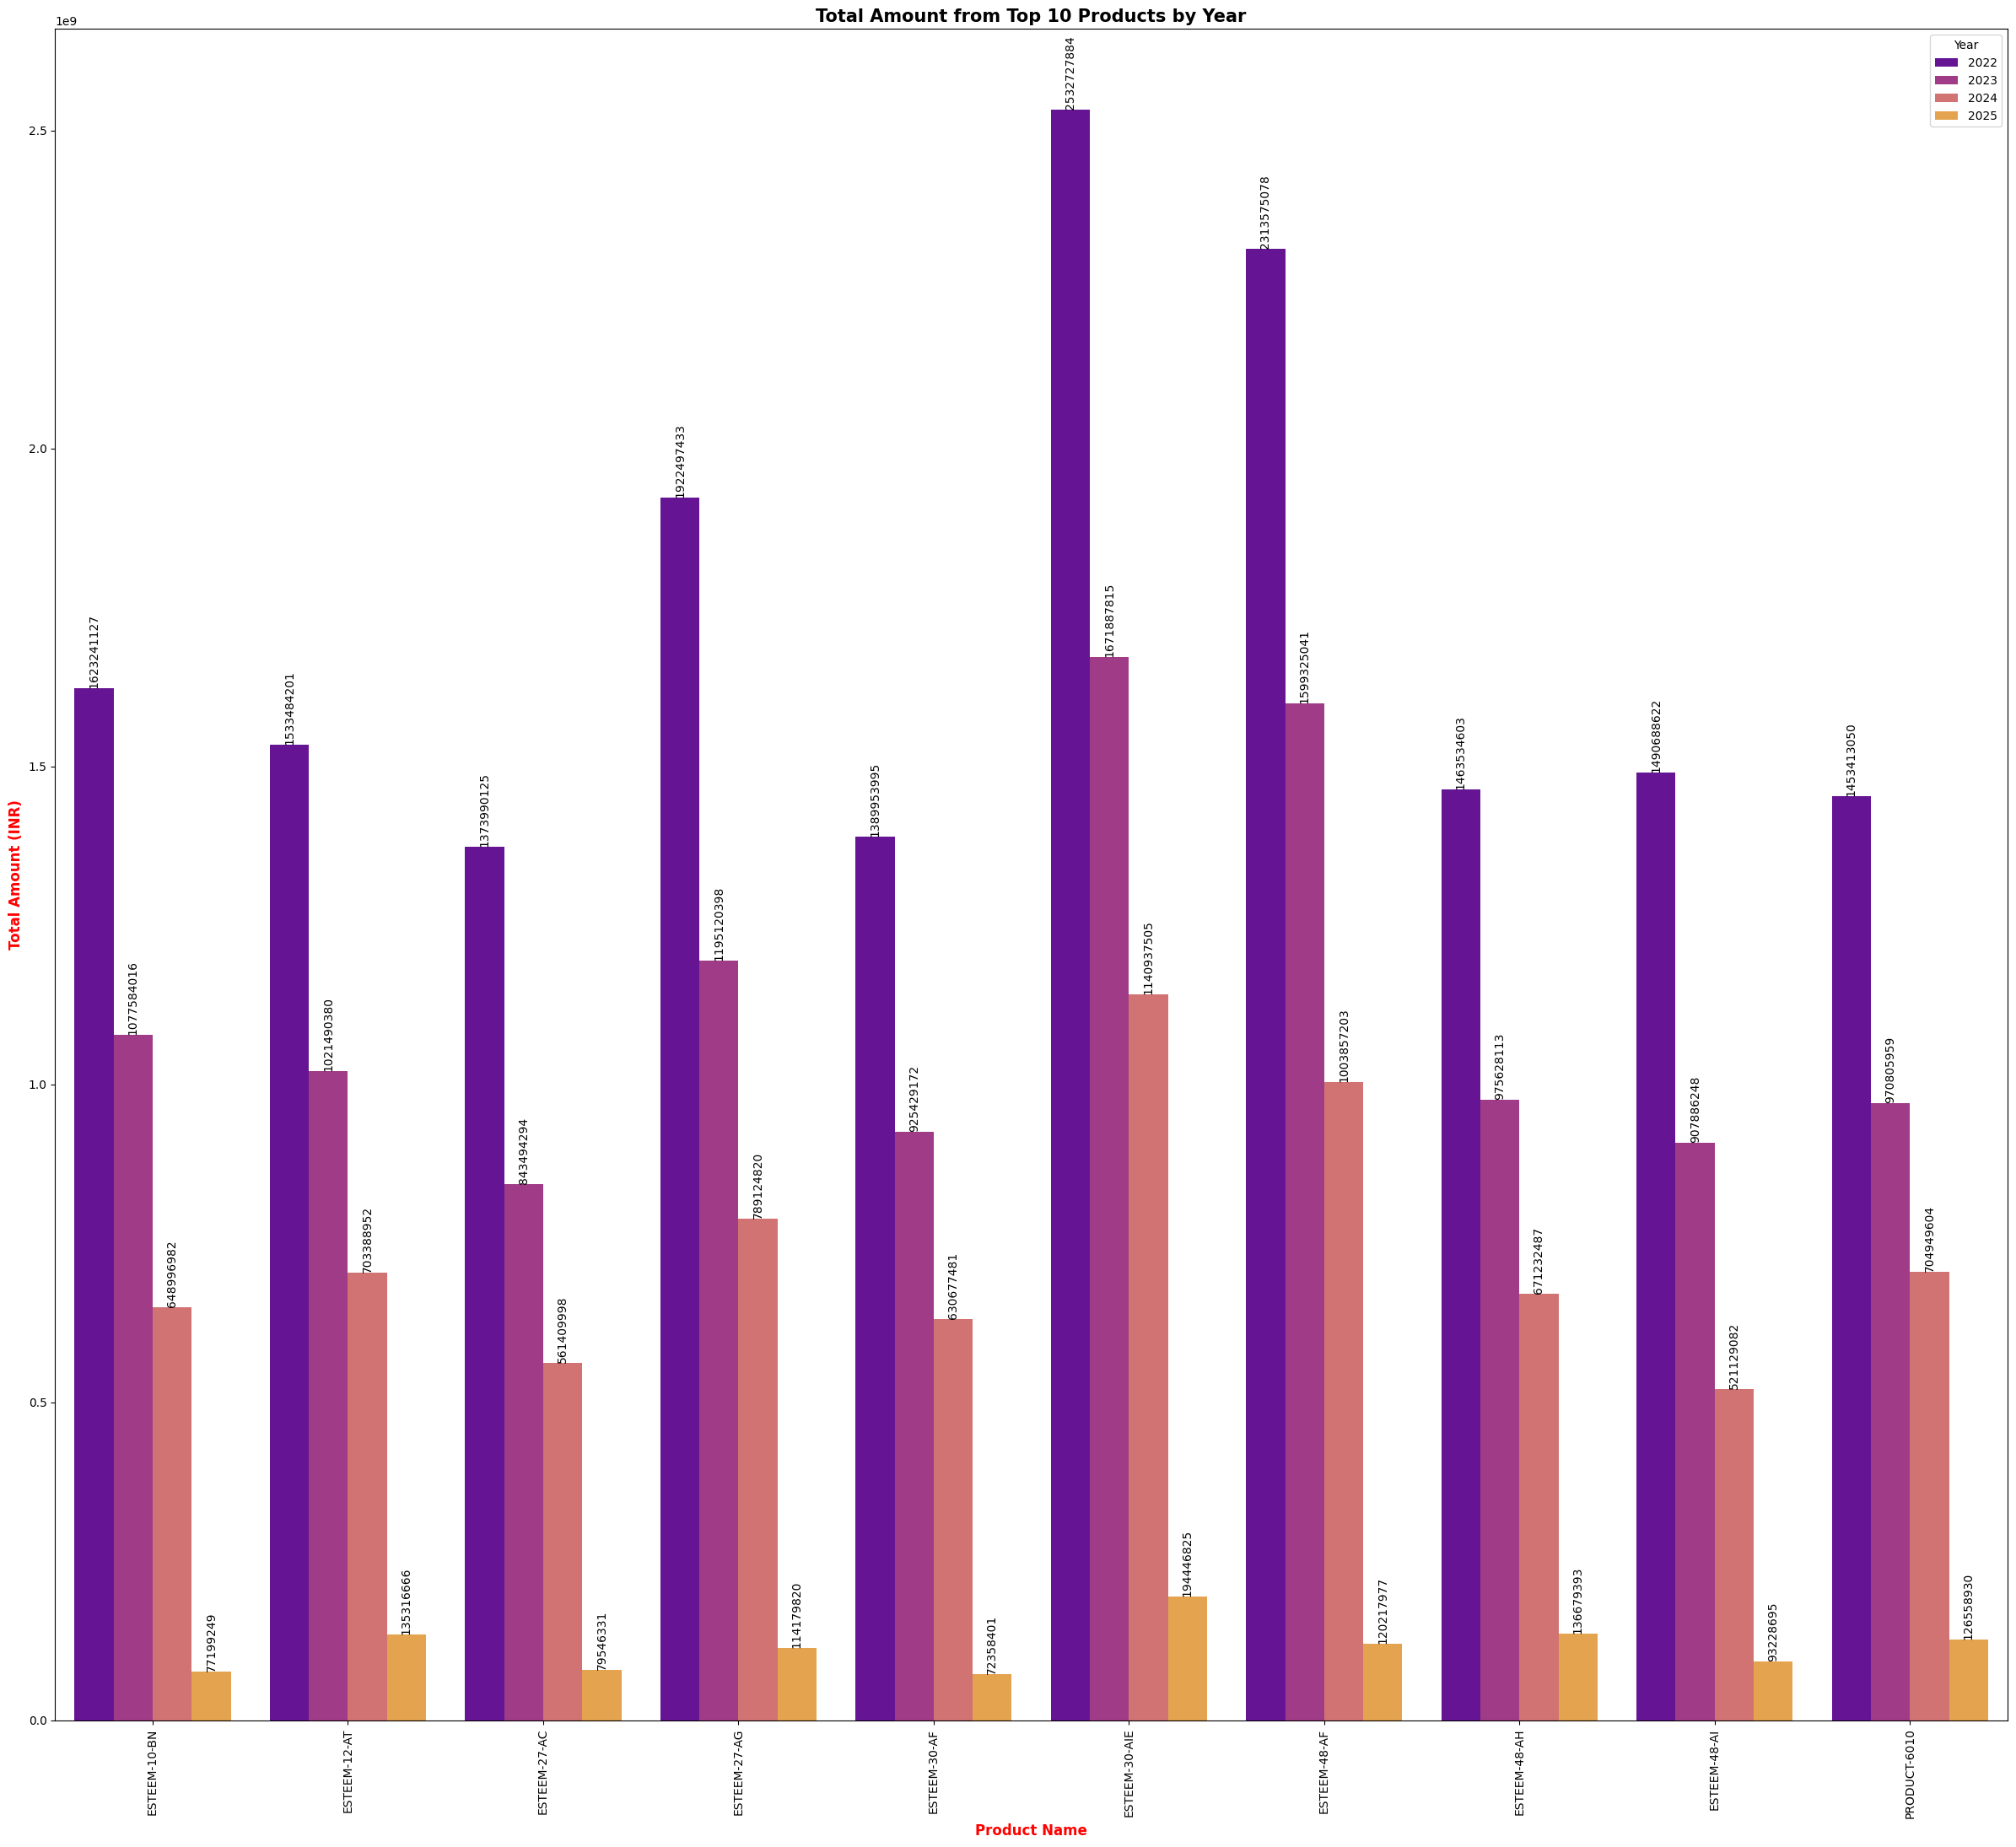

In [ ]:
# Group by Product Name and Year, and sum the Quantity and Amount
product_year_summary = df.groupby(['Product_Name', 'Year'])[['Quantity_in_Kgs', 'Amount']].sum().reset_index()

# Get the top 10 products based on total Quantity over all years
top_10_products_list = df.groupby('Product_Name')['Quantity_in_Kgs'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the summary to include only the top 10 products
top_10_product_year_summary = product_year_summary[product_year_summary['Product_Name'].isin(top_10_products_list)]

# Create a grouped bar plot for Quantity_in_Kgs
plt.figure(figsize=(20, 18))
DP1=sns.barplot(data=top_10_product_year_summary, x='Product_Name', y='Quantity_in_Kgs', hue='Year', palette='viridis')
def data_label(arg):
  for i in arg.containers:
    arg.bar_label(i, label_type="edge", color="black", rotation=90, fmt='%d')
data_label(DP1)
plt.xticks(rotation=90)
plt.xlabel('Product Name', fontsize=12, color='red', fontweight='bold')
plt.ylabel('Total Quantity in Kgs', fontsize=12, color='red', fontweight='bold')
plt.title('Total Quantity Sold for Top 10 Products by Year', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
plt.show()

# Create a grouped bar plot for Amount
plt.figure(figsize=(24, 22))
DP2=sns.barplot(data=top_10_product_year_summary, x='Product_Name', y='Amount', hue='Year', palette='plasma')
data_label(DP2)
plt.xticks(rotation=90)
plt.xlabel('Product Name', fontsize=12, color='red', fontweight='bold')
plt.ylabel('Total Amount (INR)', fontsize=12, color='red', fontweight='bold')
plt.title('Total Amount from Top 10 Products by Year', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
plt.show()

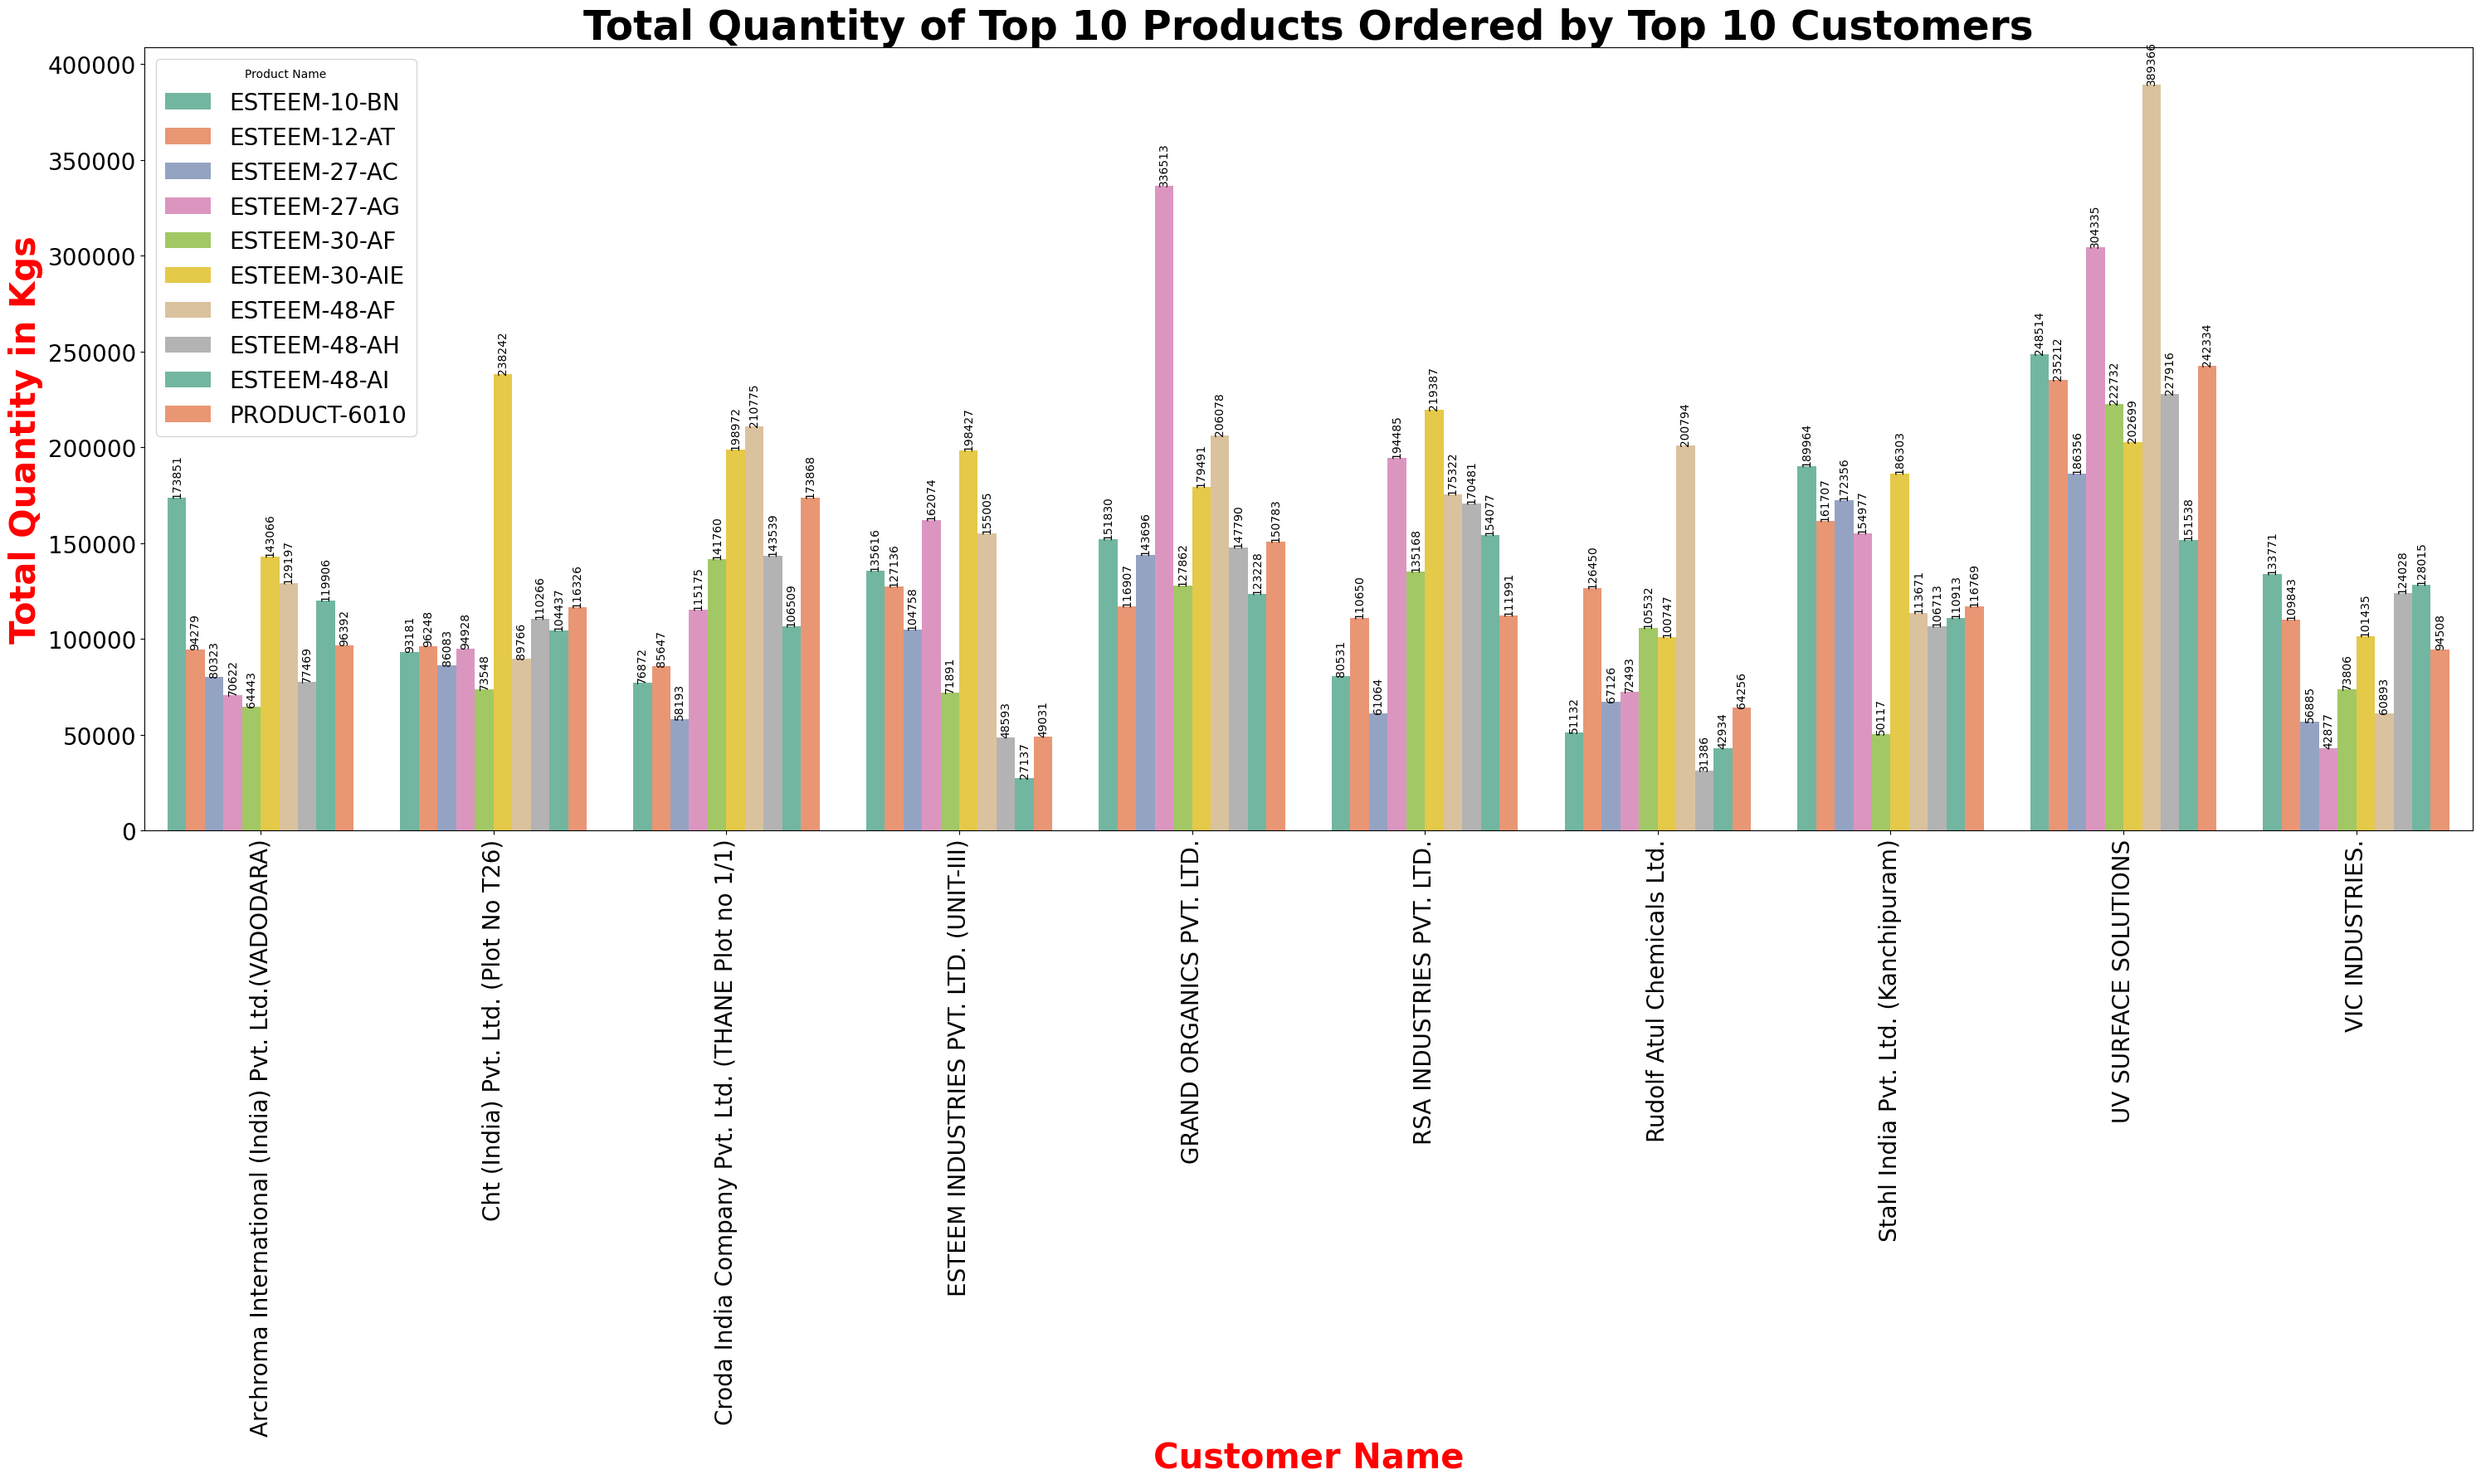

In [ ]:
# Get the top 10 customers based on total Quantity
top_10_customers_list = df.groupby('Customer_Name')['Quantity_in_Kgs'].sum().sort_values(ascending=False).head(10).index.tolist()

# Get the top 10 products based on total Quantity
top_10_products_list = df.groupby('Product_Name')['Quantity_in_Kgs'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 customers and top 10 products
top_customers_products_df = df[(df['Customer_Name'].isin(top_10_customers_list)) & (df['Product_Name'].isin(top_10_products_list))]

# Group by Customer Name and Product Name, and sum the Quantity
customer_product_summary = top_customers_products_df.groupby(['Customer_Name', 'Product_Name'])['Quantity_in_Kgs'].sum().reset_index()

plt.figure(figsize=(30, 18))
DP3=sns.barplot(data=customer_product_summary, x='Customer_Name', y='Quantity_in_Kgs', hue='Product_Name', palette='Set2')
def data_label(arg):
  for i in arg.containers:
    arg.bar_label(i, label_type="edge", color="black", rotation=90, fmt='%d')
data_label(DP3)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Customer Name', fontsize=30, color='red', fontweight='bold')
plt.ylabel('Total Quantity in Kgs', fontsize=30, color='red', fontweight='bold')
plt.title('Total Quantity of Top 10 Products Ordered by Top 10 Customers', fontsize=35, fontweight='bold')
plt.legend(title='Product Name',loc='upper left',fontsize=20)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
plt.show()